<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/Ml_Gender%26Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Library Decalaration:**

In [1]:
# Importing the Keras libraries and packages
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import keras
import glob

**Unzipping and Loading Dataset to the Console:**

In [2]:
!unzip "/content/drive/MyDrive/GenderAndAge.zip" -d "/content"

Archive:  /content/drive/MyDrive/GenderAndAge.zip
   creating: /content/GenderAndAge/
   creating: /content/GenderAndAge/Age_group/
   creating: /content/GenderAndAge/Age_group/Age_group/
   creating: /content/GenderAndAge/Age_group/Age_group/train/
   creating: /content/GenderAndAge/Age_group/Age_group/train/1-10/
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219140623097.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219140627985.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219140642920.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219154018476.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219154556757.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_group/train/1-10/1_0_0_20161219154956869.jpg.chip.jpg  
  inflating: /content/GenderAndAge/Age_group/Age_grou

**Data Loading:**

In [15]:
base_dir = os.path.join(os.getcwd(), 'GenderAndAge/Male_and_female')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [17]:
train_Male_dir = os.path.join(train_dir, 'Male')  # directory with our training male pictures
train_Female_dir = os.path.join(train_dir, 'Female')  # directory with our training female pictures
validation_Male_dir = os.path.join(validation_dir, 'Male')  # directory with our validation male pictures
validation_Female_dir = os.path.join(validation_dir, 'Female')  # directory with our validation female pictures

In [18]:
num_Male_tr = len(os.listdir(train_Male_dir))
num_Female_tr = len(os.listdir(train_Female_dir))

num_Male_val = len(os.listdir(validation_Male_dir))
num_Female_val = len(os.listdir(validation_Female_dir))

total_train = num_Male_tr + num_Female_tr
total_val = num_Male_val + num_Female_val

In [20]:
base_dir1 = os.path.join(os.getcwd(), 'GenderAndAge/Age_group')
train_dir1 = os.path.join(base_dir1, 'train')
validation_dir1 = os.path.join(base_dir1, 'validation')

In [21]:
train_1to10_dir = os.path.join(train_dir1, '1-10')  # directory with our training 1to10 pictures
train_11to25_dir = os.path.join(train_dir1, '11-25')  # directory with our training 11to25 pictures
train_26to45_dir = os.path.join(train_dir1, '26-45')  # directory with our training 26to45 pictures
train_45above_dir = os.path.join(train_dir1, '45above')  # directory with our training 45above pictures

validation_1to10_dir = os.path.join(validation_dir1, '1-10')  # directory with our validation 1to10 pictures
validation_11to25_dir = os.path.join(validation_dir1, '11-25')  # directory with our validation 11to25 pictures
validation_26to45_dir = os.path.join(validation_dir1, '26-45')  # directory with our validation 26to45 pictures
validation_45above_dir = os.path.join(validation_dir1, '45above')  # directory with our validation 45above pictures

In [25]:
num_1to10_tr = len(os.listdir(train_1to10_dir))
num_11to25_tr = len(os.listdir(train_11to25_dir))
num_26to45_tr = len(os.listdir(train_26to45_dir))
num_45above_tr = len(os.listdir(train_45above_dir))

num_1to10_val = len(os.listdir(validation_1to10_dir))
num_11to25_val = len(os.listdir(validation_11to25_dir))
num_26to40_val = len(os.listdir(validation_26to45_dir))
num_45above_val = len(os.listdir(validation_45above_dir))

total_train1 = num_1to10_tr + num_11to25_tr + num_26to45_tr + num_45above_tr
total_val1 = num_1to10_val + num_11to25_val + num_26to40_val + num_45above_val

**Setting Model Parameters:**

In [26]:
BATCH_SIZE = 200  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

**Model Creation:**

In [27]:
# Initialising the CNN
model = Sequential()

# 1st Convolutional layer
# step-1 (convolution)
model.add(Conv2D(16, kernel_size=(3, 3),input_shape=(150,150,3),activation='relu',padding="same"))
# step-2 (pooling)
model.add(MaxPooling2D(pool_size=(2, 2)))

# With more hidden layers

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Step-3 (Dropout)
model.add(Dropout(0.5))

# Step-4 (Flattening)
model.add(Flatten())

# Step 5 - Fully connected neural network
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

**Data Augmentation and Preparation:**

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [32]:
training_set_g = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 200 images belonging to 2 classes.


In [33]:
training_set_g.class_indices

{'Female': 0, 'Male': 1}

In [34]:
training_set_g.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [35]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
validation_set_g = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 80 images belonging to 2 classes.


In [38]:
validation_set_g.class_indices

{'Female': 0, 'Male': 1}

In [39]:
validation_set_g.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
training_set_a = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir1,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='categorical')

Found 199 images belonging to 4 classes.


In [42]:
training_set_a.class_indices

{'1-10': 0, '11-25': 1, '26-45': 2, '45above': 3}

In [43]:
training_set_a.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3], dtype=int32)

In [44]:
validation_set_a = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir1,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='categorical')

Found 68 images belonging to 4 classes.


In [45]:
validation_set_a.class_indices

{'1-10': 0, '11-25': 1, '26-45': 2, '45above': 3}

In [46]:
validation_set_a.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

**Train the Model:**

In [48]:
epochs=20
history = model.fit_generator(
    training_set_g,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set_g,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 46s 46s/step - loss: 0.2503 - accuracy: 0.4750 - val_loss: 0.2496 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.2502 - accuracy: 0.5150 - val_loss: 0.2498 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.2498 - accuracy: 0.5050 - val_loss: 0.2493 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.2509 - accuracy: 0.5050 - val_loss: 0.2489 - val_accuracy: 0.6000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.2485 - accuracy: 0.5400 - val_loss: 0.2482 - val_accuracy: 0.5500
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.2502 - accuracy: 0.5400 - val_loss: 0.2471 - val_accuracy: 0.6125
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.2516 - accuracy: 0.5150 - val_loss: 0.2462 - val_accuracy: 0.5875
Epoch 8/20
1/1 [=======================

In [49]:
epochs=20
history1 = model.fit_generator(
    training_set_a,
    steps_per_epoch=int(np.ceil(total_train1 / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set_a,
    validation_steps=int(np.ceil(total_val1 / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.3292 - accuracy: 0.3756 - val_loss: 0.2132 - val_accuracy: 0.6985
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.2226 - accuracy: 0.6646 - val_loss: 0.1984 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.1959 - accuracy: 0.7500 - val_loss: 0.2038 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.2008 - accuracy: 0.7500 - val_loss: 0.2005 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.1977 - accuracy: 0.7500 - val_loss: 0.1920 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.1914 - accuracy: 0.7500 - val_loss: 0.1897 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.1907 - accuracy: 0.7500 - val_loss: 0.1938 - val_accuracy: 0.7500
Epoch 8/20
1/1 [=========================

**Training Result Visualization:**

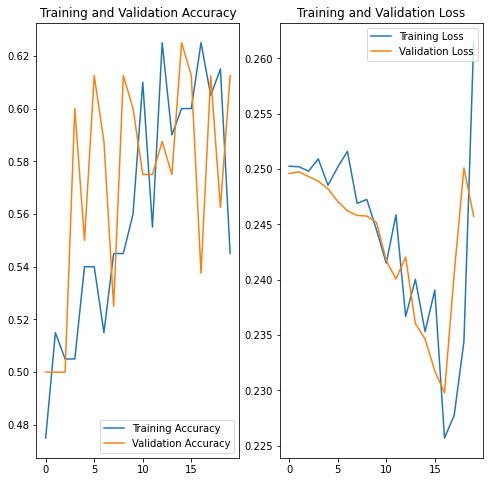

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

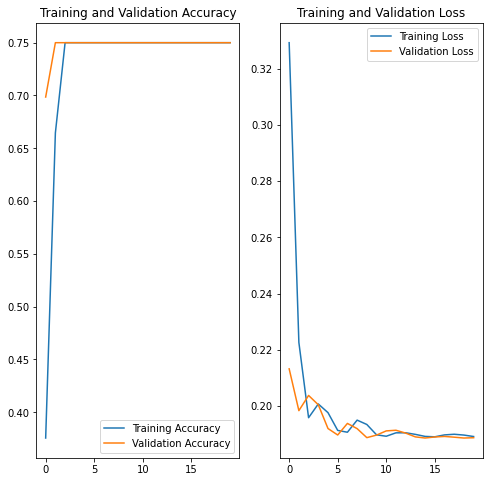

In [54]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs_range1 = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, acc1, label='Training Accuracy')
plt.plot(epochs_range1, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range1, loss1, label='Training Loss')
plt.plot(epochs_range1, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
from tensorflow.keras.preprocessing import image

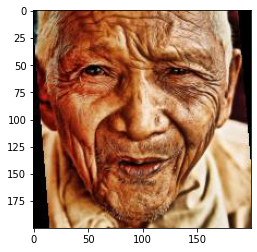

In [57]:
img = image.load_img("/content/GenderAndAge/Male_and_female/validation/Male/90_0_2_20170111210301275.jpg.chip.jpg")
plt.imshow(img)

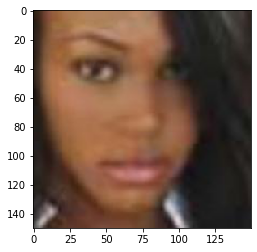

[[0.]]
[[0.]]


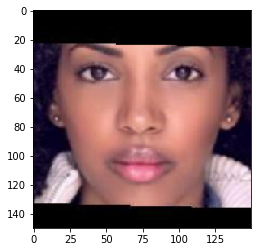

[[0.]]
[[0.]]


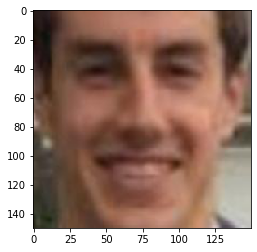

[[0.]]
[[0.]]


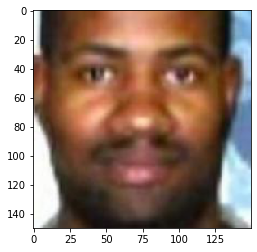

[[0.]]
[[0.]]


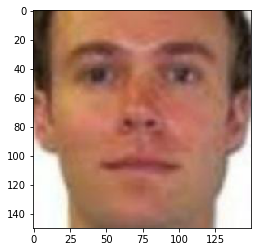

[[0.]]
[[0.]]


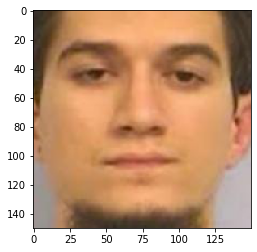

[[0.]]
[[0.]]


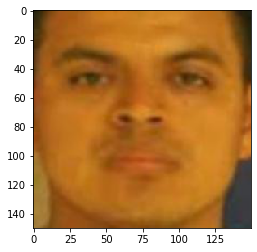

[[0.]]
[[0.]]


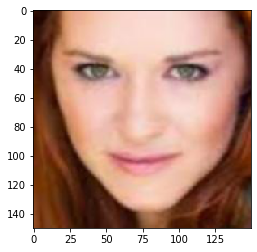

[[0.]]
[[0.]]


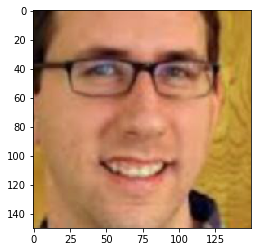

[[0.]]
[[0.]]


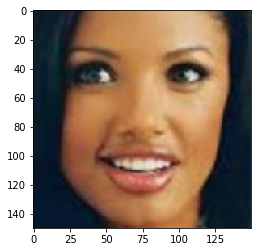

[[0.]]
[[0.]]


In [66]:
dir_path = '/content/GenderAndAge/Male_and_female/test'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(150,150))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  gender = model.predict(images)
  age = model.predict(images)
  print(gender)
  print(age)